En este notebook vamos a verificar la correlación de los datos para visualizar la relación entre las variables.

## Librerías

In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import PurePath
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

Modelados

In [2]:
z21_path_m = r"../../data_analysis\all_vars\zafra2021"
z22_path_m = r"../../data_analysis\all_vars\zafra2022"
z23_path_m = r"../../data_analysis\all_vars\zafra2023"

Reales

In [3]:
z21_path_r = r"../../datos/parcelas/ready_to_analyze/zafra2021/"
z22_path_r = r"../../datos/parcelas/ready_to_analyze/zafra2022/"
z23_path_r = r"../../datos/parcelas/ready_to_analyze/zafra2023/"

In [4]:
dfs_21_m = [(pd.read_csv(PurePath(z21_path_m, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z21_path_m) if f.endswith(".csv")]
dfs_22_m = [(pd.read_csv(PurePath(z22_path_m, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z22_path_m) if f.endswith(".csv")]
dfs_23_m = [(pd.read_csv(PurePath(z23_path_m, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z23_path_m) if f.endswith(".csv")]
dfs_21_r = [(pd.read_csv(PurePath(z21_path_r, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z21_path_r) if f.endswith(".csv")]
dfs_22_r = [(pd.read_csv(PurePath(z22_path_r, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z22_path_r) if f.endswith(".csv")]
dfs_23_r = [(pd.read_csv(PurePath(z23_path_r, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z23_path_r) if f.endswith(".csv")]

### Estructura de los datos

In [13]:
zafra2021_r = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_max_date',
    'ndvi_mean',
    'gndvi_max',
    'gndvi_max_date',
    'gndvi_mean',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'ndre_max',
    'ndre_mean',
    'ndmi_mean',
    'msi_mean'
])

zafra2021_m = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_mean',
    'ndvi_max_date',
    'gndvi_max',
    'gndvi_mean',
    'gndvi_max_date',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'ndre_max',
    'ndre_mean',
    'ndmi_mean',
    'msi_mean',
    'lluvia_acum',
    'etc_acum'
])

zafra2022_r = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_max_date',
    'ndvi_mean',
    'gndvi_max',
    'gndvi_max_date',
    'gndvi_mean',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'ndre_max',
    'ndre_mean',
    'ndmi_mean',
    'msi_mean'
])

zafra2022_m = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_mean',
    'ndvi_max_date',
    'gndvi_max',
    'gndvi_mean',
    'gndvi_max_date',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'ndre_max',
    'ndre_mean',
    'ndmi_mean',
    'msi_mean',
    'lluvia_acum',
    'etc_acum'
])

zafra2023_r = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_max_date',
    'ndvi_mean',
    'gndvi_max',
    'gndvi_max_date',
    'gndvi_mean',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'ndre_max',
    'ndre_mean',
    'ndmi_mean',
    'msi_mean'
])

zafra2023_m = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_mean',
    'ndvi_max_date',
    'gndvi_max',
    'gndvi_mean',
    'gndvi_max_date',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'ndre_max',
    'ndre_mean',
    'ndmi_mean',
    'msi_mean',
    'lluvia_acum',
    'etc_acum'
])

In [14]:
for i in dfs_21_m:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi'].max()
    ndvi_max_date_loc = i[0]['ndvi'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi'].mean()
    gndvi_max = i[0]['gndvi'].max()
    gndvi_max_date_loc = i[0]['gndvi'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi'].mean()
    cire_max = i[0]['cire'].max()
    cire_mean = i[0]['cire'].mean()
    ndre1_max = i[0]['ndre1'].max()
    ndre1_mean = i[0]['ndre1'].mean()
    ndre_max = i[0]['ndre'].max()
    ndre_mean = i[0]['ndre'].mean()
    ndmi_mean = i[0]['ndmi'].mean()
    msi_mean = i[0]['msi'].mean()
    lluvia = i[0]['precip'].sum()
    etc_acum = i[0]['etc'].sum()
    
    
    zafra2021_m = zafra2021_m._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'ndre_max': ndre_max,
        'ndre_mean': ndre_mean,
        'ndmi_mean': ndmi_mean,
        'msi_mean': msi_mean,
        'lluvia_acum': lluvia,
        'etc_acum': etc_acum
    }, ignore_index=True) 
    
    
for i in dfs_22_m:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi'].max()
    ndvi_max_date_loc = i[0]['ndvi'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi'].mean()
    gndvi_max = i[0]['gndvi'].max()
    gndvi_max_date_loc = i[0]['gndvi'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi'].mean()
    cire_max = i[0]['cire'].max()
    cire_mean = i[0]['cire'].mean()
    ndre1_max = i[0]['ndre1'].max()
    ndre1_mean = i[0]['ndre1'].mean()
    ndre_max = i[0]['ndre'].max()
    ndre_mean = i[0]['ndre'].mean()
    ndmi_mean = i[0]['ndmi'].mean()
    msi_mean = i[0]['msi'].mean()
    lluvia = i[0]['precip'].sum()
    etc_acum = i[0]['etc'].sum()
    
    
    zafra2022_m = zafra2022_m._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'ndre_max': ndre_max,
        'ndre_mean': ndre_mean,
        'ndmi_mean': ndmi_mean,
        'msi_mean': msi_mean,
        'lluvia_acum': lluvia,
        'etc_acum': etc_acum
    }, ignore_index=True)

for i in dfs_23_m:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi'].max()
    ndvi_max_date_loc = i[0]['ndvi'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi'].mean()
    gndvi_max = i[0]['gndvi'].max()
    gndvi_max_date_loc = i[0]['gndvi'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi'].mean()
    cire_max = i[0]['cire'].max()
    cire_mean = i[0]['cire'].mean()
    ndre1_max = i[0]['ndre1'].max()
    ndre1_mean = i[0]['ndre1'].mean()
    ndre_max = i[0]['ndre'].max()
    ndre_mean = i[0]['ndre'].mean()
    ndmi_mean = i[0]['ndmi'].mean()
    msi_mean = i[0]['msi'].mean()
    lluvia = i[0]['precip'].sum()
    etc_acum = i[0]['etc'].sum()
    
    
    zafra2023_m = zafra2023_m._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'ndre_max': ndre_max,
        'ndre_mean': ndre_mean,
        'ndmi_mean': ndmi_mean,
        'msi_mean': msi_mean,
        'lluvia_acum': lluvia,
        'etc_acum': etc_acum
    }, ignore_index=True)


for i in dfs_21_r:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi_mean'].max()
    ndvi_max_date_loc = i[0]['ndvi_mean'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi_mean'].mean()
    gndvi_max = i[0]['gndvi_mean'].max()
    gndvi_max_date_loc = i[0]['gndvi_mean'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi_mean'].mean()
    cire_max = i[0]['cire_mean'].max()
    cire_mean = i[0]['cire_mean'].mean()
    ndre1_max = i[0]['ndre1_mean'].max()
    ndre1_mean = i[0]['ndre1_mean'].mean()
    ndre_max = i[0]['ndre_mean'].max()
    ndre_mean = i[0]['ndre_mean'].mean()
    ndmi_mean = i[0]['ndmi_mean'].mean()
    msi_mean = i[0]['msi_mean'].mean()
    
    
    zafra2021_r = zafra2021_r._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'ndre_max': ndre_max,
        'ndre_mean': ndre_mean,
        'ndmi_mean': ndmi_mean,
        'msi_mean': msi_mean
    }, ignore_index=True)

for i in dfs_22_r:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi_mean'].max()
    ndvi_max_date_loc = i[0]['ndvi_mean'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi_mean'].mean()
    gndvi_max = i[0]['gndvi_mean'].max()
    gndvi_max_date_loc = i[0]['gndvi_mean'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi_mean'].mean()
    cire_max = i[0]['cire_mean'].max()
    cire_mean = i[0]['cire_mean'].mean()
    ndre1_max = i[0]['ndre1_mean'].max()
    ndre1_mean = i[0]['ndre1_mean'].mean()
    ndre_max = i[0]['ndre_mean'].max()
    ndre_mean = i[0]['ndre_mean'].mean()
    ndmi_mean = i[0]['ndmi_mean'].mean()
    msi_mean = i[0]['msi_mean'].mean()
    
    
    zafra2022_r = zafra2022_r._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'ndre_max': ndre_max,
        'ndre_mean': ndre_mean,
        'ndmi_mean': ndmi_mean,
        'msi_mean': msi_mean
    }, ignore_index=True)

for i in dfs_23_r:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi_mean'].max()
    ndvi_max_date_loc = i[0]['ndvi_mean'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi_mean'].mean()
    gndvi_max = i[0]['gndvi_mean'].max()
    gndvi_max_date_loc = i[0]['gndvi_mean'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi_mean'].mean()
    cire_max = i[0]['cire_mean'].max()
    cire_mean = i[0]['cire_mean'].mean()
    ndre1_max = i[0]['ndre1_mean'].max()
    ndre1_mean = i[0]['ndre1_mean'].mean()
    ndre_max = i[0]['ndre_mean'].max()
    ndre_mean = i[0]['ndre_mean'].mean()
    ndmi_mean = i[0]['ndmi_mean'].mean()
    msi_mean = i[0]['msi_mean'].mean()
    
    
    zafra2023_r = zafra2023_r._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'ndre_max': ndre_max,
        'ndre_mean': ndre_mean,
        'ndmi_mean': ndmi_mean,
        'msi_mean': msi_mean
    }, ignore_index=True)

C:\Users\vival\AppData\Local\Temp\ipykernel_2900\3336886756.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zafra2021_m = zafra2021_m._append({
C:\Users\vival\AppData\Local\Temp\ipykernel_2900\3336886756.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zafra2022_m = zafra2022_m._append({
C:\Users\vival\AppData\Local\Temp\ipykernel_2900\3336886756.py:111: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no l

In [27]:
zafra2021_r.round(decimals=3)

,parcela,ndvi_max,ndvi_max_date,ndvi_mean,gndvi_max,gndvi_max_date,gndvi_mean,cire_max,cire_mean,ndre1_max,ndre1_mean,ndre_max,ndre_mean,ndmi_mean,msi_mean
0,1,0.722,2021-07-20,0.521,0.611,2021-07-20,0.495,2.138,1.080,0.438,0.270,0.508,0.337,0.032,0.979
1,10,0.789,2021-11-07,0.593,0.675,2021-10-18,0.551,2.712,1.653,0.496,0.342,0.580,0.418,0.129,0.837
2,11,0.784,2021-10-18,0.577,0.670,2021-10-18,0.516,2.935,1.601,0.501,0.334,0.573,0.402,0.131,0.831
3,13,0.768,2021-10-18,0.561,0.644,2021-10-18,0.490,2.454,1.338,0.469,0.309,0.544,0.371,0.104,0.881
4,14,0.770,2021-07-20,0.584,0.664,2021-07-20,0.542,3.027,1.566,0.502,0.331,0.591,0.408,0.127,0.833
5,15,0.808,2021-10-03,0.593,0.690,2021-10-03,0.522,2.871,1.515,0.519,0.335,0.578,0.404,0.161,0.781
6,16,0.712,2021-06-10,0.516,0.595,2021-06-10,0.481,2.020,1.046,0.432,0.266,0.494,0.329,0.042,0.952
7,2,0.812,2021-10-18,0.545,0.693,2021-10-18,0.490,3.092,1.363,0.524,0.305,0.609,0.369,0.108,0.874
8,3,0.710,2021-06-05,0.551,0.595,2021-06-05,0.485,2.016,1.230,0.433,0.304,0.496,0.367,0.069,0.917
9,4,0.805,2021-10-18,0.487,0.687,2021-10-18,0.444,3.221,1.262,0.521,0.273,0.608,0.332,0.038,1.053


## Exportación

In [22]:
zafra2023_m.to_csv(r'../../results/yield_data/data/zafra23_m.csv', index=False)

En este punto se agregan los rendimientos de manera manual y se quitan las fechas

## Correlacion entre vis y rendimiento

### lectura de los csv

In [2]:
z21_r = pd.read_csv(r'../../results/yield_data/data/zafra21_r.csv')
z22_r = pd.read_csv(r'../../results/yield_data/data/zafra22_r.csv')
z23_r = pd.read_csv(r'../../results/yield_data/data/zafra23_r.csv')
z21_m = pd.read_csv(r'../../results/yield_data/data/zafra21_m.csv')
z22_m = pd.read_csv(r'../../results/yield_data/data/zafra22_m.csv')
z23_m = pd.read_csv(r'../../results/yield_data/data/zafra23_m.csv')

In [4]:
z21_r

,parcela,ndvi_max,ndvi_mean,gndvi_max,gndvi_mean,cire_max,cire_mean,ndre1_max,ndre1_mean,ndre_max,ndre_mean,ndmi_mean,msi_mean,rendimiento
0,1,0.722026,0.521283,0.611195,0.494867,2.137607,1.079511,0.437886,0.269966,0.508345,0.337102,0.032472,0.978848,70
1,10,0.789002,0.592955,0.674874,0.551287,2.712167,1.652685,0.495965,0.342263,0.580282,0.418252,0.129167,0.836552,80
2,11,0.784050,0.576940,0.669851,0.516115,2.934797,1.600793,0.501269,0.334255,0.572816,0.401794,0.131011,0.831293,80
3,13,0.768197,0.561279,0.643851,0.490355,2.453825,1.338366,0.469358,0.308716,0.543743,0.370580,0.103765,0.880519,65
4,14,0.770016,0.583556,0.663564,0.542240,3.027057,1.565960,0.502094,0.330635,0.591366,0.408295,0.127431,0.832562,75
5,15,0.808480,0.592573,0.689769,0.522207,2.870582,1.514764,0.518706,0.334710,0.578219,0.403675,0.160874,0.781159,75
6,16,0.711976,0.516251,0.595419,0.481171,2.020006,1.045531,0.432154,0.266351,0.494076,0.328699,0.041934,0.951557,40
7,2,0.812483,0.545351,0.693115,0.490050,3.091810,1.362674,0.524393,0.304900,0.608581,0.368623,0.107620,0.874197,75
8,5,0.786533,0.586496,0.677972,0.535719,2.761417,1.503621,0.497870,0.328689,0.580433,0.400643,0.114244,0.845076,80
9,6,0.760924,0.596542,0.654772,0.529127,2.314469,1.410946,0.459308,0.330115,0.538284,0.398992,0.121242,0.818588,80


### eliminación de inconsistencias

In [36]:
z21_m.drop(z21_m[z21_m['parcela'] == 3].index, inplace=True)
z21_r.drop(z21_r[z21_r['parcela'] == 3].index, inplace=True)
z21_m.drop(z21_m[z21_m['parcela'] == 4].index, inplace=True)
z21_r.drop(z21_r[z21_r['parcela'] == 4].index, inplace=True)
z23_m.drop(z23_m[z23_m['parcela'] == 1].index, inplace=True)
z23_m.drop(z23_m[z23_m['parcela'] == 6].index, inplace=True)
z23_m.drop(z23_m[z23_m['parcela'] == 14].index, inplace=True)
z23_m.drop(z23_m[z23_m['parcela'] == 16].index, inplace=True)
z23_r.drop(z23_r[z23_r['parcela'] == 1].index, inplace=True)
z23_r.drop(z23_r[z23_r['parcela'] == 6].index, inplace=True)
z23_r.drop(z23_r[z23_r['parcela'] == 14].index, inplace=True)
z23_r.drop(z23_r[z23_r['parcela'] == 16].index, inplace=True)

Correlación

In [41]:
z23_m.corr().sort_values(by='rendimiento', ascending=False).round(decimals=3)

,parcela,ndvi_max,ndvi_mean,gndvi_max,gndvi_mean,cire_max,cire_mean,ndre1_max,ndre1_mean,ndre_max,ndre_mean,ndmi_mean,msi_mean,lluvia_acum,etc_acum,rendimiento
rendimiento,-0.558,0.072,-0.015,0.216,0.146,0.272,0.204,0.203,0.081,0.216,0.100,-0.123,0.176,-0.349,-0.429,1.000
cire_max,0.058,0.901,0.793,0.963,0.866,1.000,0.980,0.982,0.894,0.986,0.910,0.791,-0.713,-0.239,-0.369,0.272
ndre_max,0.135,0.945,0.860,0.977,0.906,0.986,0.995,0.997,0.945,1.000,0.958,0.865,-0.785,-0.214,-0.319,0.216
gndvi_max,0.119,0.976,0.910,1.000,0.955,0.963,0.980,0.989,0.961,0.977,0.967,0.893,-0.852,-0.040,-0.172,0.216
cire_mean,0.133,0.955,0.884,0.980,0.927,0.980,1.000,0.996,0.961,0.995,0.971,0.884,-0.808,-0.158,-0.272,0.204
ndre1_max,0.136,0.964,0.888,0.989,0.931,0.982,0.996,1.000,0.960,0.997,0.969,0.887,-0.820,-0.141,-0.255,0.203
msi_mean,-0.330,-0.937,-0.979,-0.852,-0.934,-0.713,-0.808,-0.820,-0.927,-0.785,-0.912,-0.977,1.000,-0.349,-0.275,0.176
gndvi_mean,0.098,0.977,0.975,0.955,1.000,0.866,0.927,0.931,0.976,0.906,0.973,0.943,-0.934,0.169,0.048,0.146
ndre_mean,0.216,0.987,0.965,0.967,0.973,0.910,0.971,0.969,0.998,0.958,1.000,0.962,-0.912,-0.009,-0.094,0.100
ndre1_mean,0.229,0.990,0.977,0.961,0.976,0.894,0.961,0.960,1.000,0.945,0.998,0.971,-0.927,0.031,-0.058,0.081


### solo 21/22 y 22/23

In [6]:
zafras_r = pd.concat([z21_r, z22_r])
zafras_m = pd.concat([z21_m, z22_m])

In [15]:
zafras_m.to_csv(r'../../results/yield_data/data/zafra2122_2223_m.csv', index=False)

### Correlacion total

In [12]:
zafras_r.corr().sort_values(by='rendimiento', ascending=False).round(decimals=3)

,parcela,ndvi_max,ndvi_mean,gndvi_max,gndvi_mean,cire_max,cire_mean,ndre1_max,ndre1_mean,ndre_max,ndre_mean,ndmi_mean,msi_mean,rendimiento
rendimiento,-0.345,0.723,0.736,0.691,0.769,0.716,0.778,0.716,0.755,0.744,0.780,0.702,-0.629,1.000
ndre_mean,0.008,0.678,0.972,0.619,0.958,0.746,0.978,0.733,0.993,0.756,1.000,0.940,-0.890,0.780
cire_mean,0.010,0.756,0.909,0.704,0.911,0.833,1.000,0.807,0.971,0.826,0.978,0.909,-0.832,0.778
gndvi_mean,-0.011,0.561,0.944,0.513,1.000,0.644,0.911,0.633,0.927,0.666,0.958,0.853,-0.821,0.769
ndre1_mean,0.018,0.670,0.976,0.607,0.927,0.728,0.971,0.717,1.000,0.737,0.993,0.959,-0.916,0.755
ndre_max,-0.156,0.971,0.621,0.930,0.666,0.986,0.826,0.989,0.737,1.000,0.756,0.693,-0.579,0.744
ndvi_mean,0.031,0.545,1.000,0.478,0.944,0.603,0.909,0.597,0.976,0.621,0.972,0.947,-0.930,0.736
ndvi_max,-0.178,1.000,0.545,0.963,0.561,0.949,0.756,0.978,0.670,0.971,0.678,0.636,-0.513,0.723
ndre1_max,-0.150,0.978,0.597,0.919,0.633,0.980,0.807,1.000,0.717,0.989,0.733,0.675,-0.556,0.716
cire_max,-0.131,0.949,0.603,0.909,0.644,1.000,0.833,0.980,0.728,0.986,0.746,0.683,-0.561,0.716


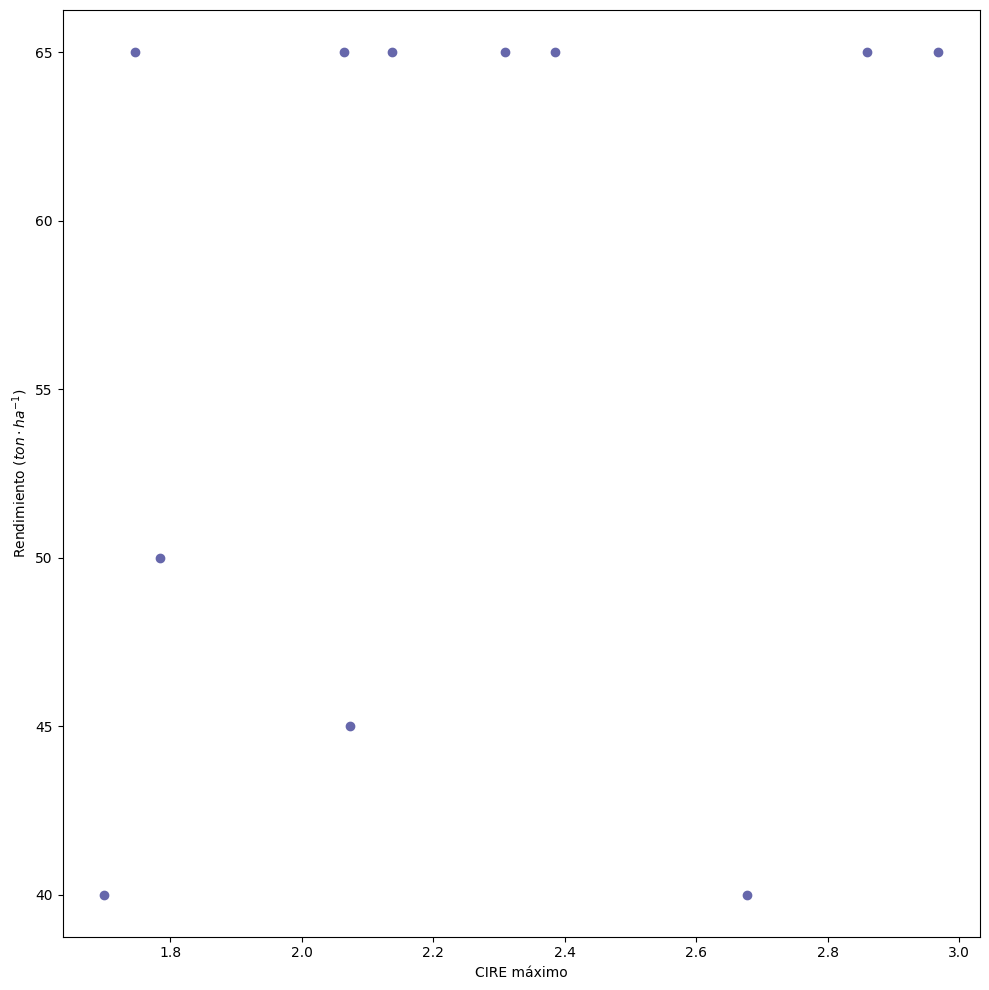

In [42]:
var_mod = 'cire_max'
plt.figure(figsize=(10, 10))
#plt.scatter(z21_r[var_mod], z21_r['rendimiento'], color='#BE3455')
#plt.scatter(z22_r[var_mod], z22_r['rendimiento'], color='#BE3455')
#plt.scatter(z23_r[var_mod], z23_r['rendimiento'], color='#BE3455')
#plt.scatter(z21_m[var_mod], z21_m['rendimiento'], color='#6667AB', label='Modelados')
#plt.scatter(z22_m[var_mod], z22_m['rendimiento'], color='#6667AB')
plt.scatter(z23_m[var_mod], z23_m['rendimiento'], color='#6667AB')
plt.xlabel('CIRE máximo')
plt.ylabel(r'Rendimiento ($ton \cdot ha^{-1}$)')
plt.tight_layout()
#plt.legend(loc='best')
plt.savefig(rf'../../tesis_img/correlacion/cire_max_23_24_modelado.pdf', dpi=150, format='pdf')
plt.show()

### Exportación nuevos datos

In [96]:
z21_r.to_csv(r'../../results/yield_data/data/zafra21_r.csv', index=False)
z21_m.to_csv(r'../../results/yield_data/data/zafra21_m.csv', index=False)
z22_r.to_csv(r'../../results/yield_data/data/zafra22_r.csv', index=False)
z22_m.to_csv(r'../../results/yield_data/data/zafra22_m.csv', index=False)
z23_r.to_csv(r'../../results/yield_data/data/zafra23_r.csv', index=False)
z23_m.to_csv(r'../../results/yield_data/data/zafra23_m.csv', index=False)
zafras_r.to_csv(r'../../results/yield_data/data/zafras_r.csv', index=False)
zafras_m.to_csv(r'../../results/yield_data/data/zafras_m.csv', index=False)